## Calculate climatology, anomalies with respect to climatology, monthly mean, and running average

In [1]:
import xarray as xr
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams #For changing text properties
import cmocean #A package with beautiful colormaps
from cartopy import crs as ccrs #Useful for plotting maps
import cartopy.util #Requires separate import
from cartopy.util import add_cyclic_point
import cartopy.feature as cf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.path as mpath
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# Read data
DIR = '/nfs/spare11/env315/data/'
datafile = DIR+'era5_u1060_daily_1980-2019.nc'
data = xr.open_mfdataset(datafile).compute()
data = data.u_component_of_wind
data

<xarray.DataArray 'u_component_of_wind' (time: 14610)> Size: 58kB
array([33.964096, 37.398537, 38.92926 , ..., 41.941204, 40.91121 ,
       41.22743 ], dtype=float32)
Coordinates:
    lat      float64 8B 60.0
    plev     float64 8B 1e+03
  * time     (time) datetime64[ns] 117kB 1980-01-01T09:00:00 ... 2019-12-31T0...

## Calculate monthly mean from daily values
### There are more than one method that can do this, here we use .resample()
### .resample() is the resampling operation. It groups the data into time intervals based on the specified frequency.
### Here we choose the resample frequency time=1ME, which time='1ME', meaning a period of 1 month. ME stands for "month end." It means the end of each month.
### Therefore, time='1ME' tells xarray to group your data into intervals that represent the end of each month.
### .mean() is the aggregation operation. It calculates the mean of the data values within each resampled time interval (the month-end intervals in this case).

In [5]:
u1060_monthly = data.resample(time='1ME').mean()
u1060_monthly

<xarray.DataArray 'u_component_of_wind' (time: 480)> Size: 2kB
array([ 4.23538055e+01,  3.27022743e+01,  1.90834081e+00, -1.23738348e+00,
       -7.39648056e+00, -1.11657143e+01, -9.95206833e+00, -3.06636453e+00,
        9.66489697e+00,  1.67572002e+01,  2.96746693e+01,  5.11083870e+01,
        5.19549294e+01,  1.38870935e+01,  9.52951050e+00,  1.09238071e+01,
       -7.89297760e-01, -8.59584332e+00, -9.15602970e+00, -2.94238615e+00,
        7.09988451e+00,  1.80389671e+01,  2.47764244e+01,  2.35631332e+01,
        2.98942909e+01,  2.46152153e+01,  2.19645405e+01, -8.25290489e+00,
       -1.25946817e+01, -1.27163782e+01, -1.07615623e+01, -3.13730979e+00,
        7.70066643e+00,  1.95255051e+01,  3.50741997e+01,  4.44031563e+01,
        4.69315872e+01,  1.97864056e+01,  6.11172199e+00, -1.21492612e+00,
       -4.25370169e+00, -1.14755497e+01, -1.03097067e+01, -2.07725406e+00,
        8.37155437e+00,  2.19970474e+01,  2.97169132e+01,  4.14214439e+01,
        5.13345947e+01,  2.44361992e+01, -5.02144670e+00,  6.09889448e-01,
       -4.17568111e+00, -1.10714655e+01, -1.19762344e+01, -4.06732798e+00,
        8.18431950e+00,  1.84413013e+01,  2.55396404e+01,  2.93572559e+01,
        5.00036192e+00,  2.08893871e+01,  9.79387760e+00, -4.34182262e+00,
       -7.60904121e+00, -1.19638977e+01, -1.14794893e+01, -3.04004407e+00,
        8.48642731e+00,  2.08528919e+01,  3.02080708e+01,  4.70774918e+01,
        3.61043282e+01,  3.32464752e+01,  6.76985550e+00, -8.83008003e+00,
       -8.73450089e+00, -1.19272070e+01, -1.05975828e+01, -3.35925221e+00,
...
        6.93996859e+00,  1.60252552e+01,  3.22834969e+01,  4.84549103e+01,
        4.14832497e+01,  2.83010750e+01,  1.06729164e+01, -7.50687981e+00,
       -1.04161873e+01, -1.11931953e+01, -1.04988213e+01, -3.23621368e+00,
        6.45607090e+00,  1.66265202e+01,  2.40548992e+01,  3.75479202e+01,
        2.17521477e+01,  2.76832752e+01,  2.38044529e+01, -1.30530682e+01,
       -1.22624435e+01, -1.28065071e+01, -1.08056126e+01, -2.28875613e+00,
        8.74457073e+00,  2.06346359e+01,  3.83431282e+01,  5.25966644e+01,
        5.12888870e+01,  3.05136909e+01, -1.15196600e+01, -4.97763395e+00,
       -5.95077991e+00, -1.06839685e+01, -1.04695644e+01, -3.39378095e+00,
        5.90645313e+00,  1.71258640e+01,  1.32398348e+01,  3.72561302e+01,
        3.75116730e+01,  1.25317392e+01,  7.75134325e+00, -2.16499162e+00,
       -6.27082157e+00, -1.00991726e+01, -9.61159325e+00, -2.84316158e+00,
        8.19176674e+00,  1.82312851e+01,  2.86347790e+01,  2.54999161e+01,
        4.16536179e+01,  2.74412966e+00,  5.02793598e+00,  9.92868781e-01,
       -5.64634085e+00, -1.08866405e+01, -1.01315584e+01, -2.42415571e+00,
        7.34123325e+00,  2.17649384e+01,  3.02165794e+01,  2.18605251e+01,
       -1.01455009e+00,  2.66134510e+01,  3.86330376e+01,  1.11491394e+01,
       -1.48766479e+01, -1.41383705e+01, -1.19522381e+01, -4.96671629e+00,
        6.90509701e+00,  2.04196281e+01,  3.08538380e+01,  3.51952209e+01],
      dtype=float32)
Coordinates:
    lat      float64 8B 60.0
    plev     float64 8B 1e+03
  * time     (time) datetime64[ns] 4kB 1980-01-31 1980-02-29 ... 2019-12-31

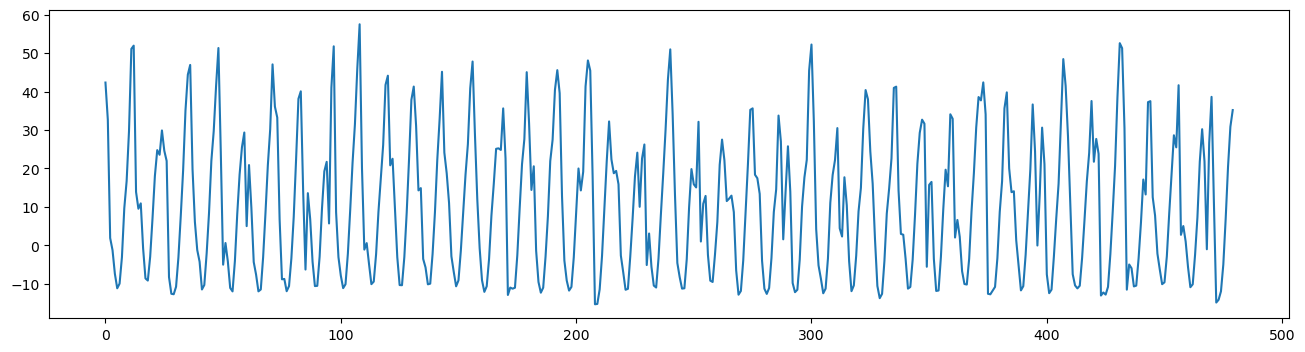

In [6]:
# plot the u1060_monthly data
fig = plt.figure(figsize =(16, 4))
plt.plot(u1060_monthly)

## Calculate daily climatology
### Climatology is done by grouping data by day/month of the year and calculating the mean for each group. We are doing so by using .groupby() method in Python.
### .groupby() method splits your xarray into groups based on the values of the specified coordinate(s) or other criteria.
### .mean() is to apply the mean function to each group. 
<span style="font-size: 24px; color: red; font-weight: bold;">We use .groupby("time.dayofyear") to group each day of the year in this case. How many groups do you think we will have? What will be in each group?</span>

In [7]:
u1060_clim = data.groupby("time.dayofyear").mean("time")
u1060_clim

<xarray.DataArray 'u_component_of_wind' (dayofyear: 366)> Size: 1kB
array([ 3.54601173e+01,  3.53185043e+01,  3.56586037e+01,  3.54111557e+01,
        3.47998428e+01,  3.47195129e+01,  3.45890732e+01,  3.45135078e+01,
        3.45221329e+01,  3.51280556e+01,  3.55638771e+01,  3.54127502e+01,
        3.56271553e+01,  3.54462433e+01,  3.50614624e+01,  3.45265579e+01,
        3.39369125e+01,  3.30688324e+01,  3.26891098e+01,  3.24942856e+01,
        3.15682335e+01,  3.04311123e+01,  2.90617161e+01,  2.75293083e+01,
        2.63643646e+01,  2.53067551e+01,  2.45739250e+01,  2.45505028e+01,
        2.44267197e+01,  2.48440552e+01,  2.45514545e+01,  2.40143929e+01,
        2.38062096e+01,  2.36268425e+01,  2.34128513e+01,  2.30455437e+01,
        2.27938423e+01,  2.30237770e+01,  2.31801682e+01,  2.28210869e+01,
        2.29760017e+01,  2.28294315e+01,  2.25666122e+01,  2.22537842e+01,
        2.18172684e+01,  2.17868118e+01,  2.17478676e+01,  2.12508373e+01,
        2.08683853e+01,  2.06168938e+01,  2.02969837e+01,  1.98312416e+01,
        1.93421745e+01,  1.89257336e+01,  1.80252075e+01,  1.72138634e+01,
        1.73232002e+01,  1.81208706e+01,  1.84819317e+01,  1.84197483e+01,
        1.76458817e+01,  1.78759575e+01,  1.81482162e+01,  1.83073273e+01,
        1.85965538e+01,  1.85489616e+01,  1.81595211e+01,  1.76492157e+01,
        1.68534393e+01,  1.58209553e+01,  1.48390226e+01,  1.40817614e+01,
        1.34462109e+01,  1.30526867e+01,  1.25901814e+01,  1.22632809e+01,
        1.23635883e+01,  1.23130388e+01,  1.18228426e+01,  1.11604252e+01,
...
        1.90730324e+01,  1.95306721e+01,  1.97244911e+01,  2.00039444e+01,
        2.03633766e+01,  2.07826462e+01,  2.12150612e+01,  2.14590778e+01,
        2.17305088e+01,  2.19413738e+01,  2.19949074e+01,  2.23610744e+01,
        2.28539886e+01,  2.32070045e+01,  2.35606861e+01,  2.40745506e+01,
        2.47368641e+01,  2.51380672e+01,  2.54555092e+01,  2.56932926e+01,
        2.55919991e+01,  2.57520714e+01,  2.61156101e+01,  2.67703552e+01,
        2.74371281e+01,  2.78369713e+01,  2.80308437e+01,  2.83403988e+01,
        2.85725136e+01,  2.88703461e+01,  2.90287933e+01,  2.91576042e+01,
        2.95348473e+01,  2.98477726e+01,  2.95957336e+01,  2.91559105e+01,
        2.87696495e+01,  2.88215294e+01,  2.90184059e+01,  2.90818367e+01,
        2.92539825e+01,  2.94456120e+01,  2.94930305e+01,  2.96112461e+01,
        2.99220028e+01,  2.97216339e+01,  2.94535618e+01,  2.93139992e+01,
        2.95507622e+01,  2.98653450e+01,  3.04631004e+01,  3.10009956e+01,
        3.15000515e+01,  3.22962608e+01,  3.31286697e+01,  3.40380669e+01,
        3.40542908e+01,  3.39557190e+01,  3.46954918e+01,  3.51899757e+01,
        3.53564682e+01,  3.53776093e+01,  3.57424927e+01,  3.52906532e+01,
        3.55754585e+01,  3.63665390e+01,  3.68352432e+01,  3.69791260e+01,
        3.67394409e+01,  3.70375404e+01,  3.76317940e+01,  3.80028267e+01,
        3.80257111e+01,  3.77702675e+01,  3.74547272e+01,  3.67739639e+01,
        3.64026108e+01,  4.04870224e+01], dtype=float32)
Coordinates:
    lat        float64 8B 60.0
    plev       float64 8B 1e+03
  * dayofyear  (dayofyear) int64 3kB 1 2 3 4 5 6 7 ... 361 362 363 364 365 366

### Calculate standard deviation of each day of the year

In [8]:
u1060_std = data.groupby("time.dayofyear").std("time")
u1060_std

<xarray.DataArray 'u_component_of_wind' (dayofyear: 366)> Size: 1kB
array([17.500967  , 18.750227  , 19.118246  , 18.690302  , 18.389156  ,
       18.75721   , 19.536917  , 19.867178  , 19.60905   , 19.359734  ,
       19.023155  , 18.412308  , 18.422697  , 18.873646  , 19.38703   ,
       19.650728  , 19.9129    , 20.091677  , 19.922005  , 19.393127  ,
       19.465546  , 19.653128  , 20.08688   , 20.293823  , 19.897018  ,
       19.538774  , 19.05036   , 18.247046  , 17.711208  , 17.481909  ,
       17.368317  , 16.821432  , 16.436478  , 16.856922  , 17.261768  ,
       17.332813  , 16.94176   , 16.796091  , 17.13799   , 17.702888  ,
       18.154999  , 18.368841  , 18.577316  , 18.286179  , 17.962816  ,
       17.05464   , 16.734392  , 16.365013  , 16.565401  , 16.614563  ,
       16.231197  , 15.873451  , 15.374077  , 15.257915  , 15.700656  ,
       16.291092  , 15.711627  , 15.265824  , 14.819002  , 14.189969  ,
       13.683479  , 13.326147  , 12.816532  , 12.893282  , 13.473342  ,
       13.983383  , 14.633817  , 14.418699  , 14.348826  , 14.175849  ,
       14.650405  , 15.123173  , 14.846572  , 15.101802  , 15.570271  ,
       14.952377  , 14.429315  , 13.776297  , 13.35774   , 12.868874  ,
       12.418452  , 12.34066   , 12.682498  , 12.498186  , 12.116694  ,
       11.952332  , 11.493914  , 11.453048  , 11.584115  , 11.433755  ,
       11.624308  , 11.32104   , 11.007282  , 10.78062   , 10.849438  ,
       10.597943  , 10.703526  , 10.650671  , 10.454341  , 10.130632  ,
...
        2.263958  ,  2.1952586 ,  2.3125722 ,  2.3102956 ,  2.2386868 ,
        2.2310562 ,  2.3810809 ,  2.622482  ,  2.8216872 ,  2.941968  ,
        3.0474992 ,  3.1645613 ,  3.2657266 ,  3.3486135 ,  3.2279375 ,
        3.219538  ,  3.304294  ,  3.458444  ,  3.4683635 ,  3.3378956 ,
        3.421088  ,  3.6150172 ,  3.8563805 ,  4.1435084 ,  4.2660966 ,
        4.4812326 ,  4.5652804 ,  4.5110345 ,  4.6366987 ,  4.9348016 ,
        5.28634   ,  5.6185117 ,  5.8704486 ,  5.977684  ,  6.099303  ,
        6.111425  ,  6.0981293 ,  6.1222396 ,  6.2122884 ,  6.165291  ,
        6.183657  ,  6.1712065 ,  6.2970347 ,  6.2277565 ,  6.20524   ,
        6.231286  ,  6.694466  ,  7.216477  ,  7.6060367 ,  7.7222652 ,
        8.093241  ,  8.436708  ,  8.572719  ,  9.186835  ,  9.900972  ,
       10.156069  , 10.134836  , 10.33182   , 10.439251  , 10.516207  ,
       10.540164  , 10.40252   , 10.3202305 , 10.302436  , 10.484426  ,
       10.693528  , 11.145101  , 11.952858  , 12.459742  , 12.898094  ,
       13.002559  , 12.911304  , 12.828335  , 13.217253  , 13.291965  ,
       12.796333  , 12.66589   , 12.723053  , 13.215529  , 13.973826  ,
       15.1039915 , 15.301581  , 14.804329  , 14.837439  , 14.460542  ,
       14.197367  , 14.446847  , 14.621394  , 14.881038  , 15.037759  ,
       15.318857  , 15.130831  , 15.363788  , 15.710562  , 16.269281  ,
       17.610859  ], dtype=float32)
Coordinates:
    lat        float64 8B 60.0
    plev       float64 8B 1e+03
  * dayofyear  (dayofyear) int64 3kB 1 2 3 4 5 6 7 ... 361 362 363 364 365 366

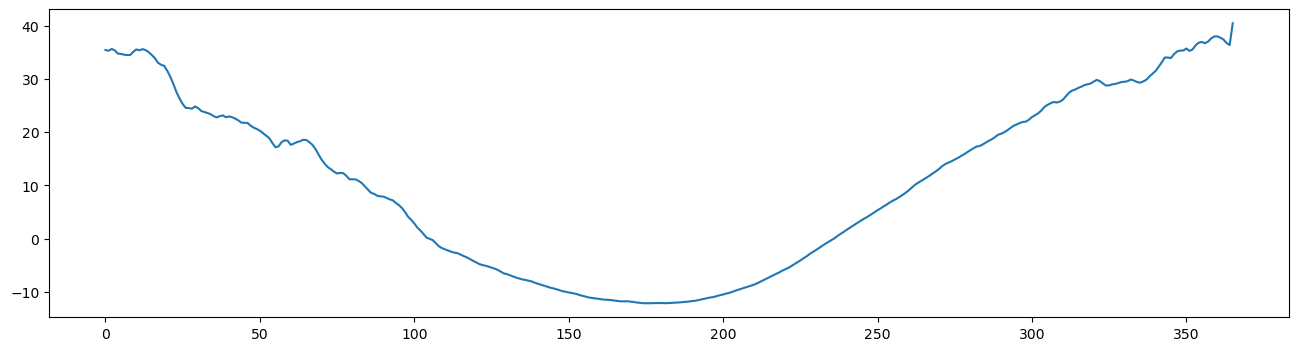

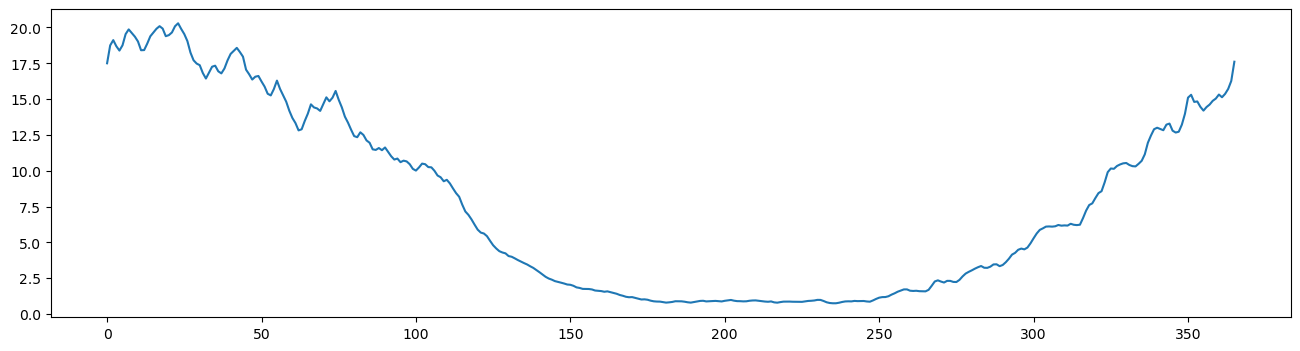

In [10]:
# plot u1060_clim data
fig = plt.figure(figsize =(16, 4))
plt.plot(u1060_clim)

# plot u1060_std data
fig = plt.figure(figsize =(16, 4))
plt.plot(u1060_std)

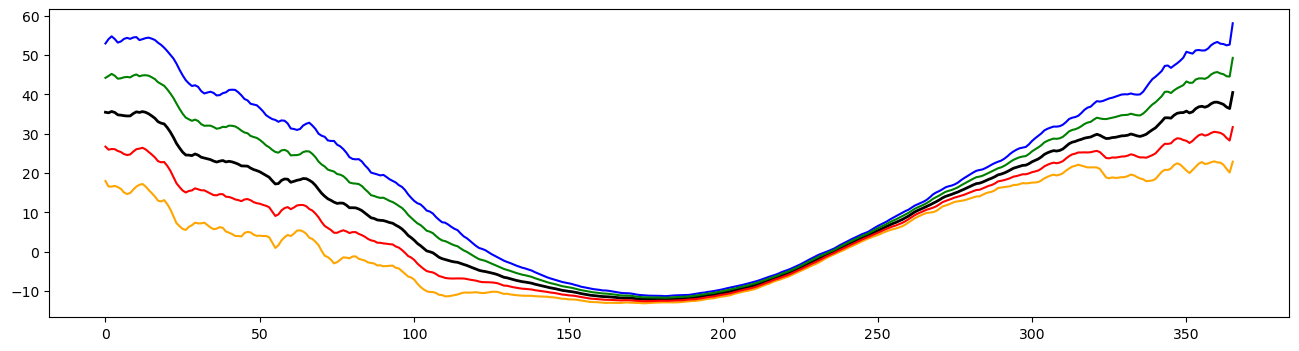

In [12]:
# plot u1060_clim data
fig = plt.figure(figsize =(16, 4))
plt.plot(u1060_clim,'k',linewidth=2)

# add +/- 1 standard deviation of u1060 on top of the daily climatology data
plt.plot(u1060_clim+u1060_std,'blue')
plt.plot(u1060_clim-u1060_std,'orange')

# add +/- 0.5 standard deviation of u1060 on top of the daily climatology data
plt.plot(u1060_clim+0.5*u1060_std,'green')
plt.plot(u1060_clim-0.5*u1060_std,'red')

## Calculate daily anomalies

In [13]:
u1060_anom = data.groupby("time.dayofyear")-u1060_clim
u1060_anom

<xarray.DataArray 'u_component_of_wind' (time: 14610)> Size: 58kB
array([-1.4960213,  2.0800323,  3.2706566, ...,  4.486477 ,  4.137245 ,
        4.8248177], dtype=float32)
Coordinates:
    lat        (time) float64 117kB 60.0 60.0 60.0 60.0 ... 60.0 60.0 60.0 60.0
    plev       (time) float64 117kB 1e+03 1e+03 1e+03 ... 1e+03 1e+03 1e+03
  * time       (time) datetime64[ns] 117kB 1980-01-01T09:00:00 ... 2019-12-31...
    dayofyear  (time) int64 117kB 1 2 3 4 5 6 7 ... 359 360 361 362 363 364 365

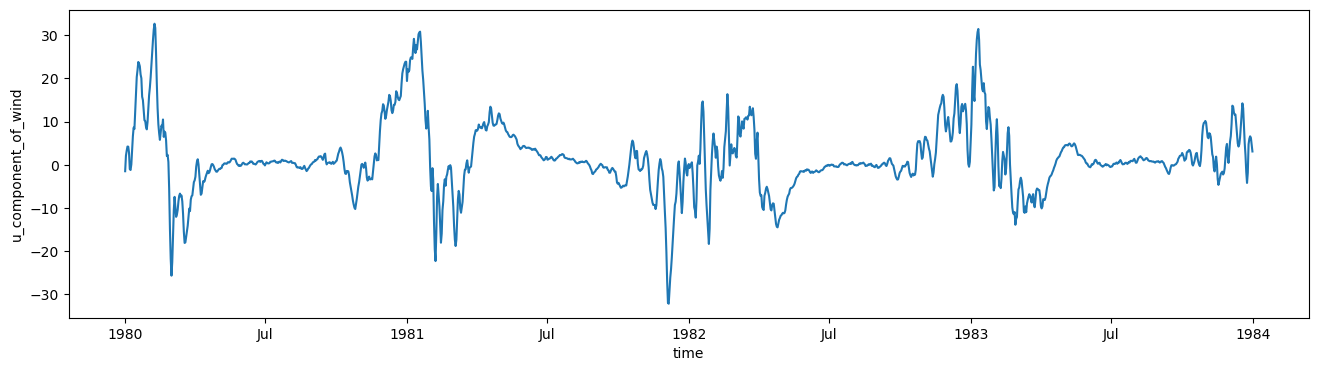

In [15]:
# plot u1060_anom for year 1980-1983
u1060_anom_sel = u1060_anom.sel(time=slice('1980-01-01','1983-12-31'))
fig = plt.figure(figsize =(16, 4))
#plt.plot(u1060_anom_sel)
u1060_anom_sel.plot()

## Calculate running average
### Here we use DataArray.rolling(dim=None, min_periods=None, center=False, **window_kwargs) from xarray. 
### documentation of the function: https://docs.xarray.dev/en/stable/generated/xarray.DataArray.rolling.html

In [17]:
# apply a 15-day running average
u1060_anom_sel_rm = u1060_anom_sel.rolling(time=15, center=True).mean()
u1060_anom_sel_rm

<xarray.DataArray 'u_component_of_wind' (time: 1461)> Size: 6kB
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
    lat        (time) float64 12kB 60.0 60.0 60.0 60.0 ... 60.0 60.0 60.0 60.0
    plev       (time) float64 12kB 1e+03 1e+03 1e+03 1e+03 ... 1e+03 1e+03 1e+03
  * time       (time) datetime64[ns] 12kB 1980-01-01T09:00:00 ... 1983-12-31T...
    dayofyear  (time) int64 12kB 1 2 3 4 5 6 7 8 ... 359 360 361 362 363 364 365

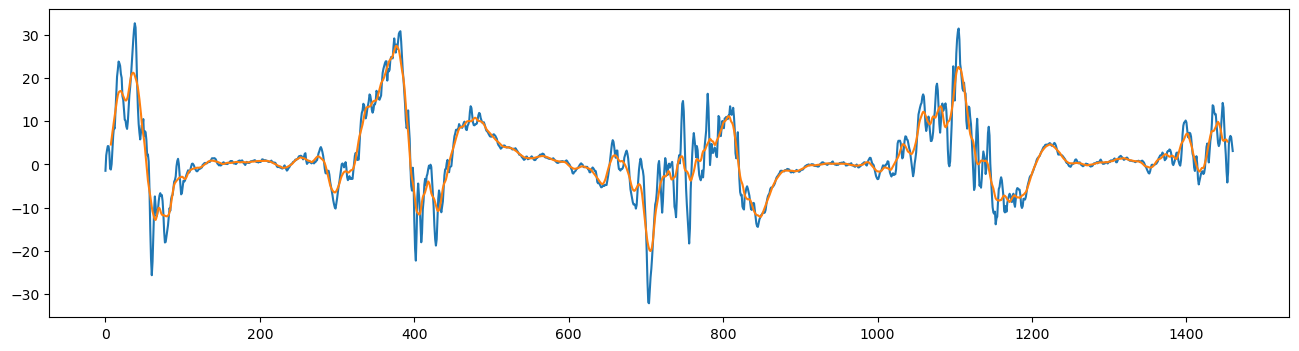

In [19]:
# plot the u1060_anom_1 data
fig = plt.figure(figsize =(16, 4))
plt.plot(u1060_anom_sel)

# plot the u1060_anom_1_rm data on top of it
plt.plot(u1060_anom_sel_rm)

## Worksheet 3 coding exercise

In [3]:
DIR = '/nfs/spare11/env315/data/'
datafile = DIR+'era5_sst_1980-2009.nc'
data = xr.open_mfdataset(datafile).compute()
data = data.sea_surface_temperature
data

<xarray.DataArray 'sea_surface_temperature' (time: 10958, latitude: 91,
                                             longitude: 180)> Size: 718MB
array([[[271.45953, 271.45953, 271.45953, ..., 271.45953, 271.45953,
         271.45953],
        [271.45953, 271.45953, 271.45953, ..., 271.45953, 271.45953,
         271.45953],
        [271.45953, 271.45953, 271.45953, ..., 271.45953, 271.45953,
         271.45953],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[271.4604 , 271.4604 , 271.4604 , ..., 271.4604 , 271.4604 ,
         271.4604 ],
        [271.4604 , 271.4604 , 271.4604 , ..., 271.4604 , 271.4604 ,
         271.4604 ],
        [271.4604 , 271.4604 , 271.4604 , ..., 271.4604 , 271.4604 ,
         271.4604 ],
...
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[271.46024, 271.46024, 271.46024, ..., 271.46024, 271.46024,
         271.46024],
        [271.46024, 271.46024, 271.46024, ..., 271.46024, 271.46024,
         271.46024],
        [271.46024, 271.46024, 271.46024, ..., 271.46024, 271.46024,
         271.46024],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 364B 90.0 88.0 86.0 84.0 ... -86.0 -88.0 -90.0
  * longitude  (longitude) float32 720B 0.0 2.0 4.0 6.0 ... 354.0 356.0 358.0
  * time       (time) datetime64[ns] 88kB 1980-01-01 1980-01-02 ... 2009-12-31
Attributes:
    long_name:   Sea surface temperature
    short_name:  sst
    units:       K

In [4]:
data = data.sel(latitude=slice(5,-5),longitude=slice(-170+360,-120+360))
nino34 = data.mean(dim='latitude').mean(dim='longitude')
nino34

<xarray.DataArray 'sea_surface_temperature' (time: 10958)> Size: 44kB
array([299.6973 , 299.6741 , 299.71252, ..., 301.36917, 301.27567,
       301.24286], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 88kB 1980-01-01 1980-01-02 ... 2009-12-31

In [5]:
nino34_mon = nino34.resample(time='1ME').mean()
nino34_mon

<xarray.DataArray 'sea_surface_temperature' (time: 360)> Size: 1kB
array([300.19922, 300.13666, 300.43704, 301.0648 , 300.98276, 300.7769 ,
       299.96048, 299.4301 , 299.61832, 299.43268, 299.49338, 299.30148,
       298.54523, 298.58212, 299.43442, 300.02228, 300.31848, 300.11627,
       299.94727, 299.365  , 299.35785, 299.2916 , 299.35385, 299.38513,
       299.42902, 299.66934, 300.40137, 301.47836, 301.75287, 301.75677,
       301.21356, 301.171  , 301.44882, 301.92276, 302.33197, 302.41913,
       302.37357, 301.9396 , 301.9947 , 301.96045, 301.8411 , 301.3368 ,
       300.16986, 299.525  , 299.36905, 298.9775 , 298.7195 , 298.64987,
       298.95905, 299.23938, 299.66687, 300.4075 , 300.4833 , 299.75717,
       299.71484, 299.51157, 299.53976, 298.96036, 298.50665, 298.3971 ,
       298.5781 , 298.96426, 299.53577, 299.99985, 300.2152 , 300.14362,
       299.73615, 299.58627, 299.26038, 299.37103, 299.34027, 299.18466,
       298.778  , 299.0233 , 299.70694, 300.48276, 300.586  , 300.72815,
       300.3811 , 300.4381 , 300.42953, 300.7464 , 300.9103 , 300.97247,
       301.05548, 300.88345, 301.51926, 301.7299 , 301.83597, 302.05954,
       301.82474, 301.74084, 301.396  , 301.15204, 300.9927 , 300.5704 ,
       300.41916, 300.2598 , 300.27756, 300.45026, 299.5495 , 299.22946,
       298.71005, 298.48288, 298.14203, 297.31052, 297.33038, 297.4809 ,
       297.6145 , 298.477  , 298.98706, 299.63406, 300.05072, 300.16846,
       299.8419 , 299.3504 , 299.18387, 299.30807, 299.31305, 299.4455 ,
...
       299.8263 , 299.5436 , 299.4546 , 299.1931 , 298.9826 , 298.78647,
       298.9931 , 299.07782, 299.9924 , 300.80334, 300.80356, 300.852  ,
       300.58182, 299.96194, 299.61636, 299.62357, 299.5967 , 299.2911 ,
       299.58813, 300.06857, 300.37122, 300.96945, 301.20648, 301.55438,
       301.1447 , 300.9537 , 300.9609 , 301.13736, 301.37576, 301.17883,
       300.7348 , 300.43594, 300.84387, 300.81863, 300.4915 , 300.55432,
       300.48663, 299.8822 , 300.01144, 300.2389 , 300.21243, 300.01898,
       299.69244, 299.85345, 300.18753, 300.8196 , 301.0944 , 300.81577,
       300.81537, 300.63687, 300.5664 , 300.4902 , 300.40652, 300.41125,
       300.11627, 299.95987, 300.6489 , 301.09225, 301.2494 , 301.14246,
       300.58408, 299.9357 , 299.71582, 299.87674, 299.3632 , 298.96622,
       298.8092 , 299.156  , 299.55444, 300.63193, 300.9718 , 300.979  ,
       300.51355, 300.3537 , 300.53384, 300.6197 , 300.8195 , 300.90253,
       300.3807 , 299.962  , 300.21768, 300.69687, 300.58737, 300.68304,
       299.85635, 299.3145 , 298.63245, 298.20435, 298.09778, 298.0953 ,
       297.8815 , 297.986  , 299.14218, 299.94168, 300.25494, 300.30597,
       300.28543, 299.93454, 299.54694, 299.4333 , 299.3635 , 298.78232,
       298.64432, 299.17847, 299.78592, 300.59976, 301.1205 , 301.24277,
       301.0312 , 300.62057, 300.56238, 300.67374, 301.24994, 301.31363],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 3kB 1980-01-31 1980-02-29 ... 2009-12-31

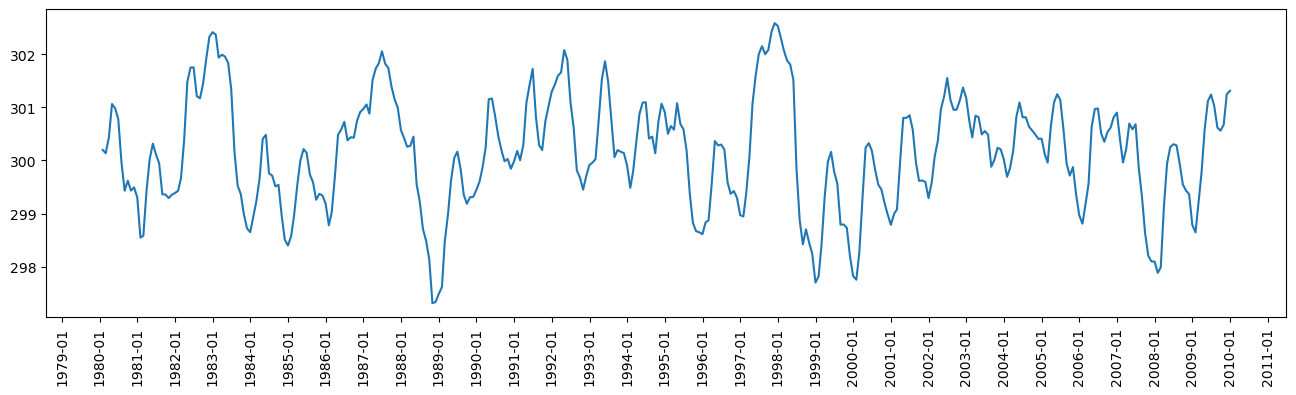

In [7]:
import matplotlib.dates as mdates
fig = plt.figure(figsize =(16, 4))
plt.plot(nino34_mon['time'], nino34_mon)

# Show dates every 12 months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1)))
# Format the date display
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90);

In [9]:
nino34_mon_clim = nino34_mon.groupby("time.month").mean(dim='time')
nino34_mon_clim

<xarray.DataArray 'sea_surface_temperature' (month: 12)> Size: 48B
array([299.58704, 299.72684, 300.2262 , 300.8293 , 300.915  , 300.7729 ,
       300.35696, 299.95712, 299.84396, 299.826  , 299.8173 , 299.7067 ],
      dtype=float32)
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

In [10]:
nino34_mon_anom = nino34_mon.groupby("time.month")-nino34_mon_clim
nino34_mon_anom

<xarray.DataArray 'sea_surface_temperature' (time: 360)> Size: 1kB
array([ 6.12182617e-01,  4.09820557e-01,  2.10845947e-01,  2.35473633e-01,
        6.77490234e-02,  3.99780273e-03, -3.96484375e-01, -5.27008057e-01,
       -2.25646973e-01, -3.93310547e-01, -3.23913574e-01, -4.05212402e-01,
       -1.04180908e+00, -1.14471436e+00, -7.91778564e-01, -8.07037354e-01,
       -5.96527100e-01, -6.56616211e-01, -4.09698486e-01, -5.92132568e-01,
       -4.86114502e-01, -5.34393311e-01, -4.63439941e-01, -3.21563721e-01,
       -1.58020020e-01, -5.74951172e-02,  1.75170898e-01,  6.49047852e-01,
        8.37860107e-01,  9.83886719e-01,  8.56597900e-01,  1.21386719e+00,
        1.60485840e+00,  2.09677124e+00,  2.51467896e+00,  2.71243286e+00,
        2.78652954e+00,  2.21276855e+00,  1.76849365e+00,  1.13113403e+00,
        9.26086426e-01,  5.63903809e-01, -1.87103271e-01, -4.32128906e-01,
       -4.74914551e-01, -8.48480225e-01, -1.09777832e+00, -1.05682373e+00,
       -6.27990723e-01, -4.87457275e-01, -5.59326172e-01, -4.21813965e-01,
       -4.31701660e-01, -1.01571655e+00, -6.42120361e-01, -4.45556641e-01,
       -3.04199219e-01, -8.65631104e-01, -1.31063843e+00, -1.30960083e+00,
       -1.00894165e+00, -7.62573242e-01, -6.90429688e-01, -8.29467773e-01,
       -6.99798584e-01, -6.29272461e-01, -6.20819092e-01, -3.70849609e-01,
       -5.83587646e-01, -4.54956055e-01, -4.77020264e-01, -5.22033691e-01,
       -8.09020996e-01, -7.03552246e-01, -5.19256592e-01, -3.46557617e-01,
       -3.29010010e-01, -4.47387695e-02,  2.41394043e-02,  4.80987549e-01,
...
        1.67480469e-01,  4.12902832e-01,  3.95141602e-01,  3.12286377e-01,
        1.05407715e-01,  1.26617432e-01, -3.86657715e-02, -9.70458984e-03,
        1.79382324e-01,  4.28771973e-02,  4.58404541e-01,  6.79748535e-01,
        7.22442627e-01,  6.64215088e-01,  5.89233398e-01,  7.04559326e-01,
        5.29235840e-01,  2.33032227e-01,  4.22698975e-01,  2.62939453e-01,
        3.34381104e-01,  3.69567871e-01,  2.27111816e-01, -2.14233398e-02,
       -1.28143311e-01,  5.07507324e-02, -4.54101562e-01, -7.40478516e-01,
       -7.77832031e-01, -5.70831299e-01, -6.71752930e-01, -1.97387695e-01,
        5.67932129e-02,  2.06115723e-01,  1.56585693e-01,  3.96575928e-01,
        6.89880371e-01,  7.93701172e-01,  1.00219727e+00,  1.19583130e+00,
        7.93670654e-01,  2.35168457e-01, -8.51440430e-03, -1.32446289e-01,
       -3.27636719e-01, -8.98437500e-02, -5.00610352e-01, -6.42608643e-01,
       -1.21151733e+00, -1.62164307e+00, -1.71951294e+00, -1.61138916e+00,
       -1.70553589e+00, -1.74084473e+00, -1.08401489e+00, -8.87634277e-01,
       -6.60064697e-01, -4.66918945e-01, -7.15332031e-02, -2.25830078e-02,
       -2.97027588e-01, -3.92700195e-01, -4.53796387e-01, -9.24377441e-01,
       -9.42718506e-01, -5.48370361e-01, -4.40277100e-01, -2.29553223e-01,
        2.05505371e-01,  4.69879150e-01,  6.74224854e-01,  6.63452148e-01,
        7.18414307e-01,  8.47747803e-01,  1.43264771e+00,  1.60693359e+00],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 3kB 1980-01-31 1980-02-29 ... 2009-12-31
    month    (time) int64 3kB 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12

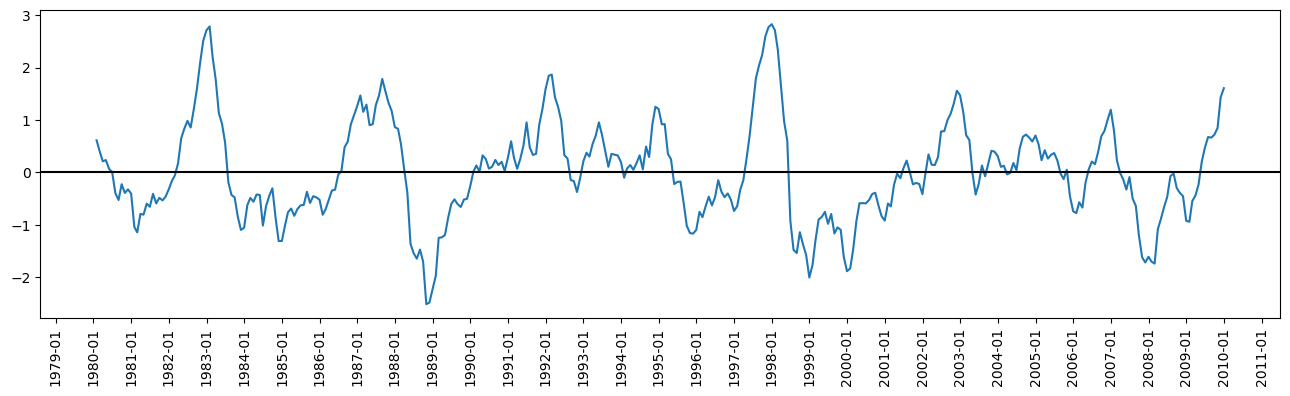

In [11]:
fig = plt.figure(figsize =(16, 4))
plt.plot(nino34_mon_anom['time'], nino34_mon_anom.values)
plt.axhline(y=0, color='k', linestyle='-')

# Show dates every 12 months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1)))
# Format the date display
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90);

In [12]:
nino34_mon_std = nino34_mon.groupby("time.month").std(dim='time')
nino34_mon_std

<xarray.DataArray 'sea_surface_temperature' (month: 12)> Size: 48B
array([1.2144958 , 0.99888825, 0.7564537 , 0.61824125, 0.6337718 ,
       0.6802777 , 0.7340905 , 0.82630366, 0.88002527, 1.0949378 ,
       1.2447668 , 1.3203535 ], dtype=float32)
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

In [13]:
nino34_mon_z = nino34_mon_anom.groupby("time.month")/nino34_mon_std
nino34_mon_z

<xarray.DataArray 'sea_surface_temperature' (time: 360)> Size: 1kB
array([ 5.04063189e-01,  4.10276681e-01,  2.78729498e-01,  3.80876601e-01,
        1.06898136e-01,  5.87672181e-03, -5.40102839e-01, -6.37789786e-01,
       -2.56409645e-01, -3.59208107e-01, -2.60220289e-01, -3.06896895e-01,
       -8.57812047e-01, -1.14598835e+00, -1.04669797e+00, -1.30537605e+00,
       -9.41233277e-01, -9.65217888e-01, -5.58103502e-01, -7.16604054e-01,
       -5.52386999e-01, -4.88058150e-01, -3.72310638e-01, -2.43543655e-01,
       -1.30111620e-01, -5.75591065e-02,  2.31568575e-01,  1.04982936e+00,
        1.32202184e+00,  1.44630158e+00,  1.16688323e+00,  1.46903276e+00,
        1.82365036e+00,  1.91496837e+00,  2.02020073e+00,  2.05432320e+00,
        2.29439211e+00,  2.21523142e+00,  2.33787441e+00,  1.82959974e+00,
        1.46123016e+00,  8.28931808e-01, -2.54877657e-01, -5.22966206e-01,
       -5.39660156e-01, -7.74911821e-01, -8.81914794e-01, -8.00409675e-01,
       -5.17079353e-01, -4.87999797e-01, -7.39405692e-01, -6.82280540e-01,
       -6.81162655e-01, -1.49309111e+00, -8.74715507e-01, -5.39216578e-01,
       -3.45670998e-01, -7.90575624e-01, -1.05291879e+00, -9.91856217e-01,
       -8.30749393e-01, -7.63421953e-01, -9.12719011e-01, -1.34165716e+00,
       -1.10418069e+00, -9.25022900e-01, -8.45698297e-01, -4.48805481e-01,
       -6.63148761e-01, -4.15508598e-01, -3.83220583e-01, -3.95374179e-01,
       -6.66137338e-01, -7.04335272e-01, -6.86435401e-01, -5.60554028e-01,
       -5.19130111e-01, -6.57654479e-02,  3.28834169e-02,  5.82095385e-01,
...
        1.90313250e-01,  3.77101630e-01,  3.17442268e-01,  2.36517251e-01,
        8.67913365e-02,  1.26758352e-01, -5.11145256e-02, -1.56970918e-02,
        2.83039302e-01,  6.30289614e-02,  6.24452353e-01,  8.22637677e-01,
        8.20933938e-01,  6.06623590e-01,  4.73368496e-01,  5.33614159e-01,
        4.35765892e-01,  2.33291581e-01,  5.58790267e-01,  4.25302356e-01,
        5.27604938e-01,  5.43260276e-01,  3.09378505e-01, -2.59267148e-02,
       -1.45613223e-01,  4.63503338e-02, -3.64808530e-01, -5.60818374e-01,
       -6.40456736e-01, -5.71466625e-01, -8.88029158e-01, -3.19272935e-01,
        8.96114558e-02,  3.02987605e-01,  2.13305712e-01,  4.79939699e-01,
        7.83932447e-01,  7.24882424e-01,  8.05128515e-01,  9.05690253e-01,
        6.53498054e-01,  2.35430196e-01, -1.12556843e-02, -2.14230761e-01,
       -5.16963243e-01, -1.32069230e-01, -6.81946337e-01, -7.77690649e-01,
       -1.37668467e+00, -1.48103666e+00, -1.38139355e+00, -1.22042251e+00,
       -1.40431607e+00, -1.74278224e+00, -1.43302214e+00, -1.43574095e+00,
       -1.04148638e+00, -6.86365187e-01, -9.74446610e-02, -2.73301564e-02,
       -3.37521672e-01, -3.58650684e-01, -3.64563376e-01, -7.00098455e-01,
       -7.76222110e-01, -5.48980713e-01, -5.82027853e-01, -3.71300399e-01,
        3.24257702e-01,  6.90716684e-01,  9.18449223e-01,  8.02915633e-01,
        8.16356480e-01,  7.74242878e-01,  1.15093660e+00,  1.21704805e+00],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 3kB 1980-01-31 1980-02-29 ... 2009-12-31
    month    (time) int64 3kB 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12

In [14]:
nino34_mon_z_rm = nino34_mon_z.rolling(time=5, center=True).mean()
nino34_mon_z_rm

<xarray.DataArray 'sea_surface_temperature' (time: 360)> Size: 1kB
array([            nan,             nan,  3.36168826e-01,  2.36531526e-01,
        4.64556217e-02, -1.36848226e-01, -2.64305472e-01, -3.57526720e-01,
       -4.10746127e-01, -3.64104956e-01, -4.08109397e-01, -5.86025119e-01,
       -7.23523140e-01, -9.32554245e-01, -1.05942154e+00, -1.08090270e+00,
       -9.63325739e-01, -8.97306979e-01, -7.46709168e-01, -6.56074107e-01,
       -5.37492692e-01, -4.74580705e-01, -3.57282221e-01, -2.58316636e-01,
       -1.14391290e-01,  1.70036718e-01,  4.83149797e-01,  7.98432469e-01,
        1.04332089e+00,  1.29081380e+00,  1.44557798e+00,  1.56416726e+00,
        1.67894709e+00,  1.85643506e+00,  2.02150702e+00,  2.09982324e+00,
        2.18440437e+00,  2.14628410e+00,  2.02766562e+00,  1.73457348e+00,
        1.24055171e+00,  6.68383598e-01,  1.94531590e-01, -2.52696812e-01,
       -5.94866157e-01, -7.03972518e-01, -7.02795148e-01, -6.92463100e-01,
       -6.85361862e-01, -6.45435035e-01, -6.21585608e-01, -8.16787958e-01,
       -8.94131124e-01, -8.54093254e-01, -7.86771357e-01, -8.08653951e-01,
       -7.20619500e-01, -7.44047642e-01, -8.02354217e-01, -8.85904372e-01,
       -9.10333097e-01, -9.68080759e-01, -9.90545630e-01, -1.00940037e+00,
       -1.02585566e+00, -9.33072925e-01, -7.97371209e-01, -6.59636796e-01,
       -5.51276326e-01, -4.61211532e-01, -5.04677892e-01, -5.12915194e-01,
       -5.67100525e-01, -6.02567255e-01, -6.27318442e-01, -5.07244051e-01,
       -3.59800309e-01, -1.06094159e-01,  1.39097214e-01,  4.11044240e-01,
...
        1.94165349e-01,  2.06140950e-01,  2.41633147e-01,  2.28922173e-01,
        1.43278942e-01,  7.66510665e-02,  8.59554708e-02,  8.12029988e-02,
        1.80741802e-01,  3.55492234e-01,  5.22818446e-01,  5.87535322e-01,
        6.69603229e-01,  6.51435554e-01,  5.74061215e-01,  4.56532747e-01,
        4.46966082e-01,  4.37352836e-01,  4.36150998e-01,  4.57649887e-01,
        4.72867280e-01,  3.55923861e-01,  2.41740763e-01,  1.45489842e-01,
       -3.61239240e-02, -2.10163295e-01, -3.33069295e-01, -4.18239981e-01,
       -6.05115891e-01, -5.96008778e-01, -4.65922803e-01, -2.77233928e-01,
       -1.20279461e-01,  1.53314307e-01,  3.73955369e-01,  5.01009583e-01,
        6.01437747e-01,  7.39914656e-01,  7.74626315e-01,  6.64925873e-01,
        5.17698288e-01,  3.13826412e-01,  2.92957127e-02, -1.27817750e-01,
       -3.11293066e-01, -4.64580059e-01, -6.97070837e-01, -8.89885485e-01,
       -1.13975036e+00, -1.24744558e+00, -1.37277067e+00, -1.44599020e+00,
       -1.43638730e+00, -1.44725680e+00, -1.41146958e+00, -1.26787937e+00,
       -9.38811839e-01, -6.57673478e-01, -4.38029617e-01, -3.01462471e-01,
       -2.37102106e-01, -3.57632875e-01, -5.07411242e-01, -5.49703062e-01,
       -5.94378471e-01, -5.95725894e-01, -3.90854686e-01, -9.74669158e-02,
        1.96019068e-01,  4.73007768e-01,  7.10539162e-01,  8.00536156e-01,
        8.92580152e-01,  9.52299953e-01,             nan,             nan],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 3kB 1980-01-31 1980-02-29 ... 2009-12-31
    month    (time) int64 3kB 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12

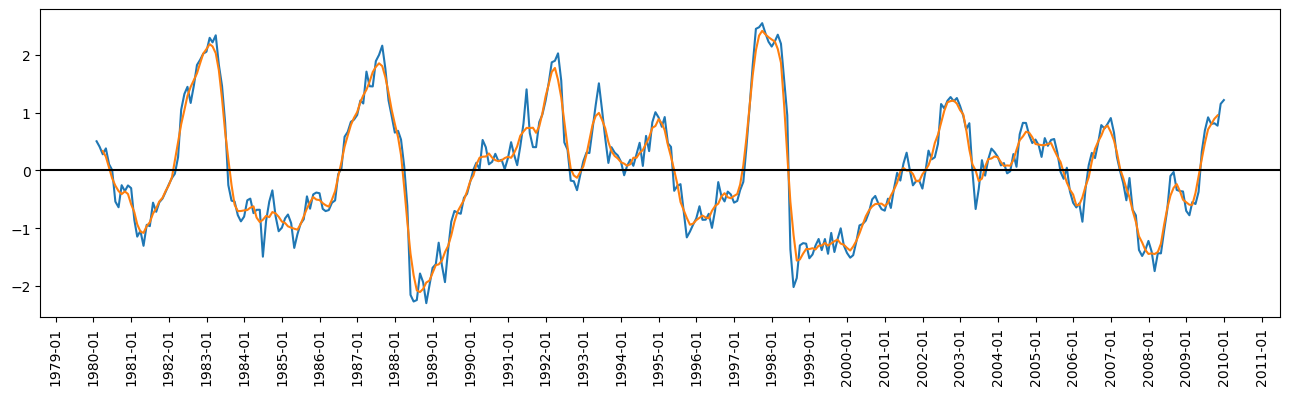

In [15]:
fig = plt.figure(figsize =(16, 4))
plt.plot(nino34_mon_z['time'], nino34_mon_z.values)
plt.plot(nino34_mon_z_rm['time'], nino34_mon_z_rm.values)
plt.axhline(y=0, color='k', linestyle='-')

# Show dates every 12 months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1)))
# Format the date display
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90);